### IMPORTING THE LIBRARIES

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
#from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

### LOADING THE DATASET

In [2]:
#Read the CSV File containing dataset using Pandas Library
df_original = pd.read_csv("zomato.csv")

In [3]:
df_original.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df_original.columns


Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### PREPROCESSING THE DATA

In [5]:
#Deleting Unnnecessary Columns
df_original = df_original.drop(['url','dish_liked','phone'],axis=1)

In [6]:
#Removing the Duplicates records
df_original.duplicated().sum()
df_original.drop_duplicates(inplace=True)

In [7]:
#Remove the NaN values from the dataset
df_original.isnull().sum()
df_original.dropna(how='any',inplace=True)

In [8]:
#Changing the Columns Names to proper names
df_original.columns
df_original = df_original.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df_original.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [9]:
#Convert cost objecttype into numerical type
df_original['cost'] = df_original['cost'].astype(str)
df_original['cost'] = df_original['cost'].apply(lambda x: x.replace(',','.'))
df_original['cost'] = df_original['cost'].astype(float)
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [10]:
#Removing '/5' from Rates and replace proper rating
df_original['rate'].unique()
df_original = df_original.loc[df_original.rate !='NEW']
df_original = df_original.loc[df_original.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == str else x
df_original.rate = df_original.rate.apply(remove_slash).str.strip().astype('float')
df_original['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [11]:
# Adjust the column names
df_original.name = df_original.name.apply(lambda x:x.title())
df_original.online_order.replace(('Yes','No'),(True, False),inplace=True)
df_original.book_table.replace(('Yes','No'),(True, False),inplace=True)
df_original.cost.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

In [12]:
df_original.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [13]:
df = df_original.copy()

In [14]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [15]:
df = df.drop(['address','name','reviews_list','type', 'city'], axis=1)

In [16]:
df.head(2)

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,[]
1,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,[]


In [17]:
from sklearn.preprocessing import LabelEncoder
cat_to_num = df[['online_order','book_table','location','rest_type','cuisines','menu_item']]
le = LabelEncoder() 
for i in cat_to_num:
    df[i] = le.fit_transform(cat_to_num[i])

In [18]:
df.head(2)

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,4.1,775,1,24,1894,800.0,8242
1,1,0,4.1,787,1,24,816,800.0,8242


In [19]:
df["rate"] = pd.to_numeric(df["rate"])

In [20]:
# Discretizing the ratings into a categorical feature with 4 classes
df["rate"] = pd.cut(df["rate"], bins = [0, 3.0, 3.5, 4.0, 5.0], labels = ["0", "1", "2", "3"])

In [21]:
df['rate']

0        3
1        3
2        2
3        2
4        2
        ..
41232    2
41233    0
41234    2
41235    3
41236    1
Name: rate, Length: 41237, dtype: category
Categories (4, object): ['0' < '1' < '2' < '3']

In [22]:
# Checking the number of restaurants in each rating class
np.unique(df["rate"], return_counts = True)

(array(['0', '1', '2', '3'], dtype=object),
 array([ 3206, 10873, 18007,  9151]))

In [23]:
#Defining the independent variables and dependent variables
x = df.iloc[:,[0,1,3,4,5,6,7,8]]
y = df['rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=353)
x_train.head()
y_train.head()

9792     1
18964    2
32151    2
7739     2
39367    3
Name: rate, dtype: category
Categories (4, object): ['0' < '1' < '2' < '3']

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
x_train

array([[ 0.72384564, -0.42594307, -0.38713899, ..., -0.2494686 ,
        -0.28619272, -1.97843455],
       [ 0.72384564, -0.42594307, -0.35647666, ..., -1.20228651,
         1.56821683,  0.4987845 ],
       [ 0.72384564, -0.42594307, -0.39168155, ...,  1.53538751,
        -0.69828373,  0.4987845 ],
       ...,
       [-1.38151001, -0.42594307, -0.36101923, ..., -1.45875706,
        -0.08014722,  0.4987845 ],
       [ 0.72384564, -0.42594307, -0.38146078, ..., -0.17342209,
        -0.08014722,  0.17749448],
       [ 0.72384564, -0.42594307, -0.26108277, ..., -1.3707817 ,
         0.12589829,  0.4987845 ]])

In [26]:
x_test

array([[-1.38151001, -0.42594307, -0.38373206, ...,  1.42206331,
         0.33194379,  0.4987845 ],
       [ 0.72384564, -0.42594307, -0.21792839, ..., -1.40656829,
         0.12589829,  0.4987845 ],
       [ 0.72384564, -0.42594307, -0.30764407, ..., -1.09343564,
         0.5379893 ,  0.4987845 ],
       ...,
       [ 0.72384564, -0.42594307, -0.25540456, ...,  0.56169408,
         0.95008031,  0.4987845 ],
       [ 0.72384564, -0.42594307, -0.32694998, ...,  0.19935487,
         0.12589829,  0.4987845 ],
       [-1.38151001, -0.42594307, -0.36783308, ...,  0.03085968,
        -1.51834485,  0.4987845 ]])

### CLASSIFICATION

### 1. LOGISTIC REGRESSION CLASSIFIER

In [27]:
from sklearn.linear_model import LogisticRegression
my_model = LogisticRegression()
result = my_model.fit(x_train, y_train)
predictions = result.predict(x_test)
predictions
from sklearn.metrics import accuracy_score
print('Accracy of Logistic Regression Classifier :',accuracy_score(y_test, predictions))
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual Label 0','Actual Label 1','Actual Label 2','Actual Label 3'], columns=['Predicted Label 0','Predicted Label 1','Predicted Label 2','Predicted Label 3'])
confusion_df

Accracy of Logistic Regression Classifier : 0.592992240543162


,Predicted Label 0,Predicted Label 1,Predicted Label 2,Predicted Label 3
Actual Label 0,0,230,433,8
Actual Label 1,0,1441,694,7
Actual Label 2,0,831,2514,262
Actual Label 3,0,10,882,936


### 2. DECISION TREE CLASSIFIER

In [28]:
print(y_test.dtype)
print(predictions.dtype)


category
object


In [36]:
from sklearn.tree import DecisionTreeClassifier
my_model = DecisionTreeClassifier(random_state=0)
result = my_model.fit(x_train,y_train)
predictions = result.predict(x_test)
predictions = predictions.astype(float)  # Convert to float type

from sklearn.metrics import mean_absolute_error,accuracy_score
mean_absolute_error(y_test, predictions)
print("Accuracy Score for Decision Tress=",accuracy_score(y_test,predictions))
from sklearn.metrics import confusion_matrix
y_test = y_test.astype(float) 
matrix=confusion_matrix(y_test,predictions)
confusion_df = pd.DataFrame(matrix, index=['Actual Label 0','Actual Label 1','Actual Label 2','Actual Label 3'], columns=['Predicted Label 0','Predicted Label 1','Predicted Label 2','Predicted Label 3'])
confusion_df

Accuracy Score for Decision Tress= 0.9369544131910766


,Predicted Label 0,Predicted Label 1,Predicted Label 2,Predicted Label 3
Actual Label 0,591,36,42,2
Actual Label 1,45,1976,110,11
Actual Label 2,42,119,3394,52
Actual Label 3,4,8,49,1767



### 3. KNN Clasifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier
my_model = KNeighborsClassifier(n_neighbors=1)
result = my_model.fit(x_train,y_train)
predictions = result.predict(x_test)
predictions = predictions.astype(float)  # Convert to float type
from sklearn.metrics import classification_report,confusion_matrix
y_test = y_test.astype(float) 
matrix = confusion_matrix(y_test,predictions)
print("Accuracy of KNN Classifier:",accuracy_score(y_test, predictions))
from sklearn import metrics
confusion_df = pd.DataFrame(matrix, index=['Actual Label 0','Actual Label 1','Actual Label 2','Actual Label 3'], columns=['Predicted Label 0','Predicted Label 1','Predicted Label 2','Predicted Label 3'])
confusion_df

Accuracy of KNN Classifier: 0.8983996120271581


,Predicted Label 0,Predicted Label 1,Predicted Label 2,Predicted Label 3
Actual Label 0,550,54,56,11
Actual Label 1,55,1878,200,9
Actual Label 2,62,214,3255,76
Actual Label 3,10,20,71,1727


### 4. RANDOM FOREST CLASSIFIER

In [32]:
from sklearn.ensemble import RandomForestClassifier
my_model = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
result=my_model.fit(x_train, y_train)
predictions = result.predict(x_test)
predictions
predictions = predictions.astype(float)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
from sklearn.metrics import confusion_matrix
y_test = y_test.astype(float) 
conf_matrix =confusion_matrix(predictions,y_test)
confusion_df = pd.DataFrame(conf_matrix, index=['Actual Label 0','Actual Label 1','Actual Label 2','Actual Label 3'], columns=['Predicted Label 0','Predicted Label 1','Predicted Label 2','Predicted Label 3'])
confusion_df

Accuracy: 0.9479873908826382


,Predicted Label 0,Predicted Label 1,Predicted Label 2,Predicted Label 3
Actual Label 0,573,11,16,3
Actual Label 1,33,2003,77,0
Actual Label 2,65,128,3483,65
Actual Label 3,0,0,31,1760


### 5.SVM CLASSIFIER

In [33]:
from sklearn.svm import SVC
my_model = SVC(kernel = 'rbf', random_state = 0)
result = my_model.fit(x_train, y_train)
predictions = result.predict(x_test)
predictions
predictions = predictions.astype(float)
from sklearn import metrics
print("Accuracy of Support Vector Machine Classifier:",accuracy_score(y_test, predictions))
from sklearn.metrics import confusion_matrix
y_test = y_test.astype(float) 
conf_matrix =confusion_matrix(predictions,y_test)
confusion_df = pd.DataFrame(conf_matrix ,index=['Actual Label 0','Actual Label 1','Actual Label 2','Actual Label 3'], columns=['Predicted Label 0','Predicted Label 1','Predicted Label 2','Predicted Label 3'])
confusion_df

Accuracy of Support Vector Machine Classifier: 0.5905674102812803


,Predicted Label 0,Predicted Label 1,Predicted Label 2,Predicted Label 3
Actual Label 0,0,0,0,1
Actual Label 1,172,1020,571,10
Actual Label 2,485,1114,2740,706
Actual Label 3,14,8,296,1111


### 6.GRADIENT BOOSTING CLASSIFIER

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
my_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1,random_state=0)
result = my_model.fit(x_train, y_train)
predictions = result.predict(x_test)
predictions = predictions.astype(float)
from sklearn import metrics
print("Accuracy of Support Gradient Boosting Classifier:",round(metrics.accuracy_score(y_test, predictions)*100,2))
from sklearn.metrics import confusion_matrix
y_test = y_test.astype(float)
conf_matrix =confusion_matrix(predictions,y_test)
confusion_df = pd.DataFrame(conf_matrix ,index=['Actual Label 0','Actual Label 1','Actual Label 2','Actual Label 3'], columns=['Predicted Label 0','Predicted Label 1','Predicted Label 2','Predicted Label 3'])
confusion_df

Accuracy of Support Gradient Boosting Classifier: 69.18


,Predicted Label 0,Predicted Label 1,Predicted Label 2,Predicted Label 3
Actual Label 0,12,1,2,1
Actual Label 1,95,1333,206,1
Actual Label 2,548,802,3051,516
Actual Label 3,16,6,348,1310


### 7.NAIVE BAYES CLASSIFIER

In [35]:
from sklearn.naive_bayes import GaussianNB
my_model = GaussianNB()
result = my_model.fit(x_train,y_train)
predictions = result.predict(x_test)
predictions = predictions.astype(float)
from sklearn import metrics
print("Accuracy of Naive bayes Classifier id: ",round(accuracy_score(y_test,predictions)*100,2))
from sklearn.metrics import confusion_matrix
y_test = y_test.astype(float)
matrix = confusion_matrix(predictions,y_test,)
confusion_df = pd.DataFrame(matrix, index=['Actual Label 0','Actual Label 1','Actual Label 2','Actual Label 3'], columns=['Predicted Label 0','Predicted Label 1','Predicted Label 2','Predicted Label 3'])
confusion_df

Accuracy of Naive bayes Classifier id:  45.0


,Predicted Label 0,Predicted Label 1,Predicted Label 2,Predicted Label 3
Actual Label 0,20,17,60,25
Actual Label 1,528,1971,2455,277
Actual Label 2,108,132,681,486
Actual Label 3,15,22,411,1040


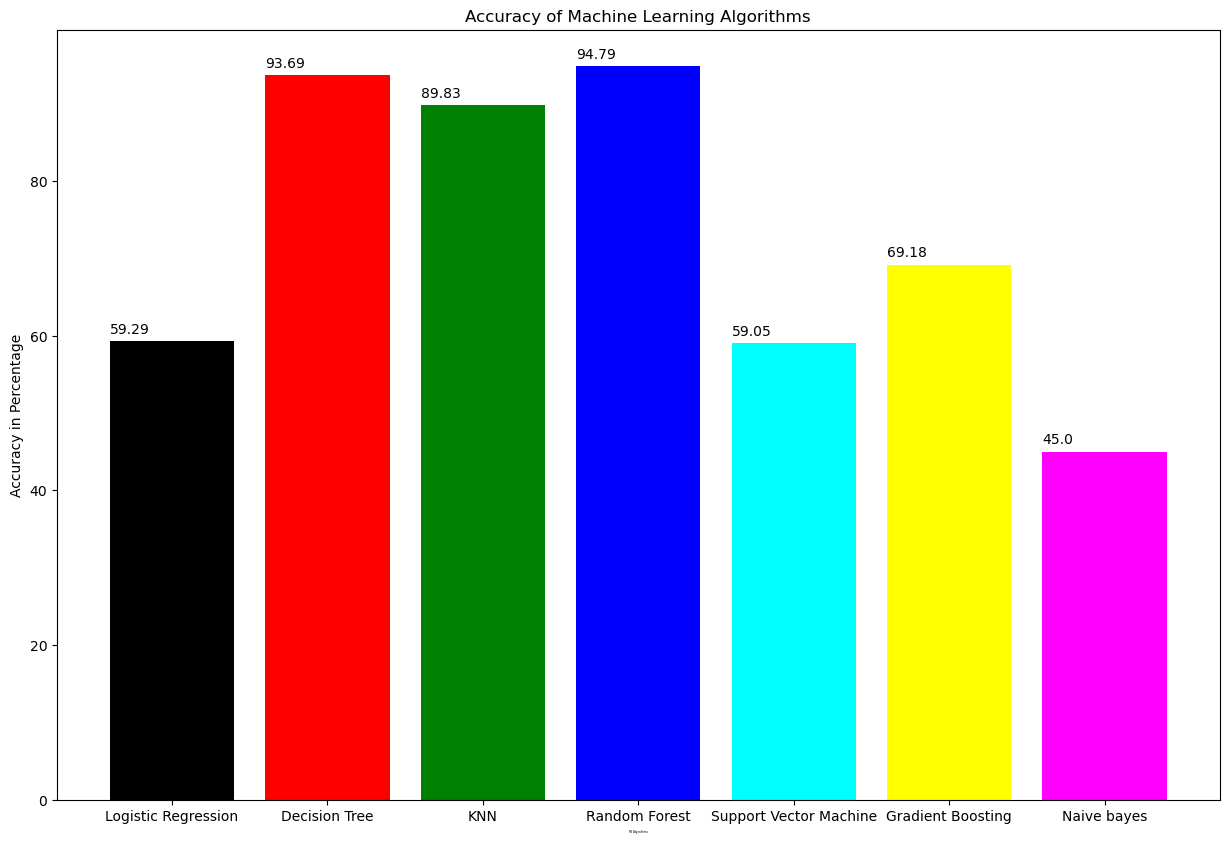

In [37]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = [59.29, 93.69, 89.83, 94.79, 59.05, 69.18, 45]
bars = ('Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest','Support Vector Machine', 'Gradient Boosting', 'Naive bayes')
plt.figure(figsize=(15,10))
y_pos = np.arange(len(bars))
bars = plt.bar(bars,height=accuracy, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'magenta'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 1,yval)

#plt.xticks(y_pos, bars)
plt.xlabel("Ml Algorithms",fontsize=2)
plt.ylabel("Accuracy in Percentage")
plt.title("Accuracy of Machine Learning Algorithms")
plt.show()

### Exploratory Data Analysis for Zomato Dataset

/var/folders/1v/sf63j7414tq0ptm581jqw8l00000gn/T/ipykernel_24891/49404291.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = label_encoders[col].fit_transform(df_selected[col])
/var/folders/1v/sf63j7414tq0ptm581jqw8l00000gn/T/ipykernel_24891/49404291.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = label_encoders[col].fit_transform(df_selected[col])


Index(['online_order', 'book_table', 'rate', 'votes', 'cost'], dtype='object')


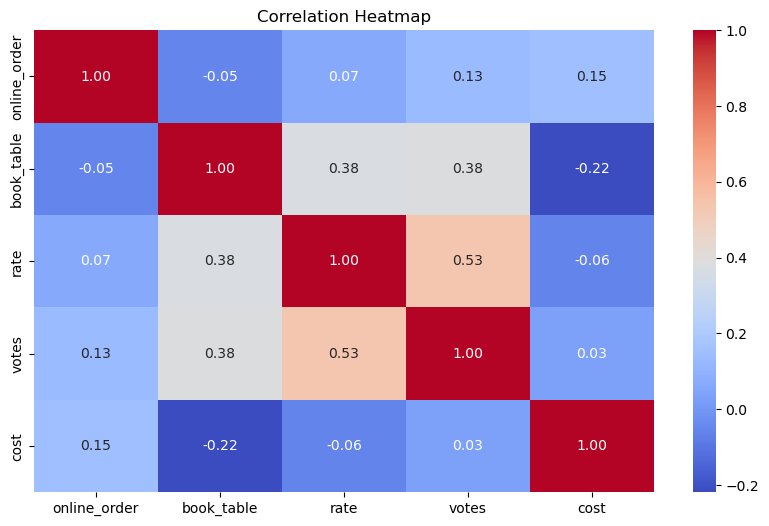

In [38]:
#Correlation between different variables
selected_columns = ['online_order', 'book_table', 'rate', 'votes', 'cost']

# Select only the specified columns
df_selected = df_original[selected_columns]

# Encode non-numeric data into numeric values
label_encoders = {}
for col in df_selected.select_dtypes(exclude=['number']).columns:
    label_encoders[col] = LabelEncoder()
    df_selected[col] = label_encoders[col].fit_transform(df_selected[col])

# Display the selected columns
print(df_selected.columns)

# Calculate correlation among numeric variables
corr = df_selected.corr(method='kendall')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


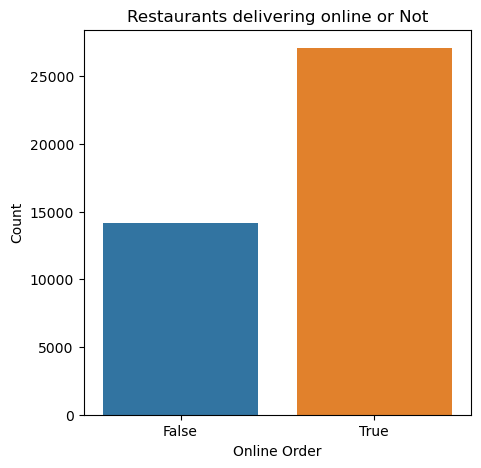

In [39]:
#Restaurants delivering Online or not
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(5, 5))

# Create a count plot of 'online_order'
sns.countplot(x='online_order', data=df_original)

# Set the title
plt.title('Restaurants delivering online or Not')

# Set the labels for x and y axes
plt.xlabel('Online Order')
plt.ylabel('Count')

# Show the plot
plt.show()



In [40]:
df_original.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

### Restaurants allowing table booking or not

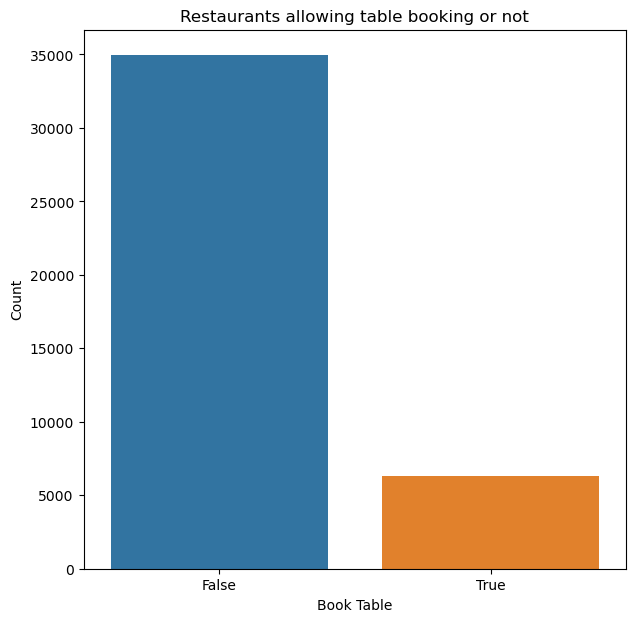

In [41]:
#Restaurants allowing table booking or not
#Set the figure size
plt.figure(figsize=(7, 7))

# Create a count plot of 'book_table'
sns.countplot(x='book_table', data=df_original)

# Set the title
plt.title('Restaurants allowing table booking or not')

# Set the labels for x and y axes
plt.xlabel('Book Table')
plt.ylabel('Count')

# Show the plot
plt.show()

### Types of Services

['Buffet' 'Cafes' 'Delivery' 'Desserts' 'Dine-out' 'Drinks & nightlife'
 'Pubs and bars']


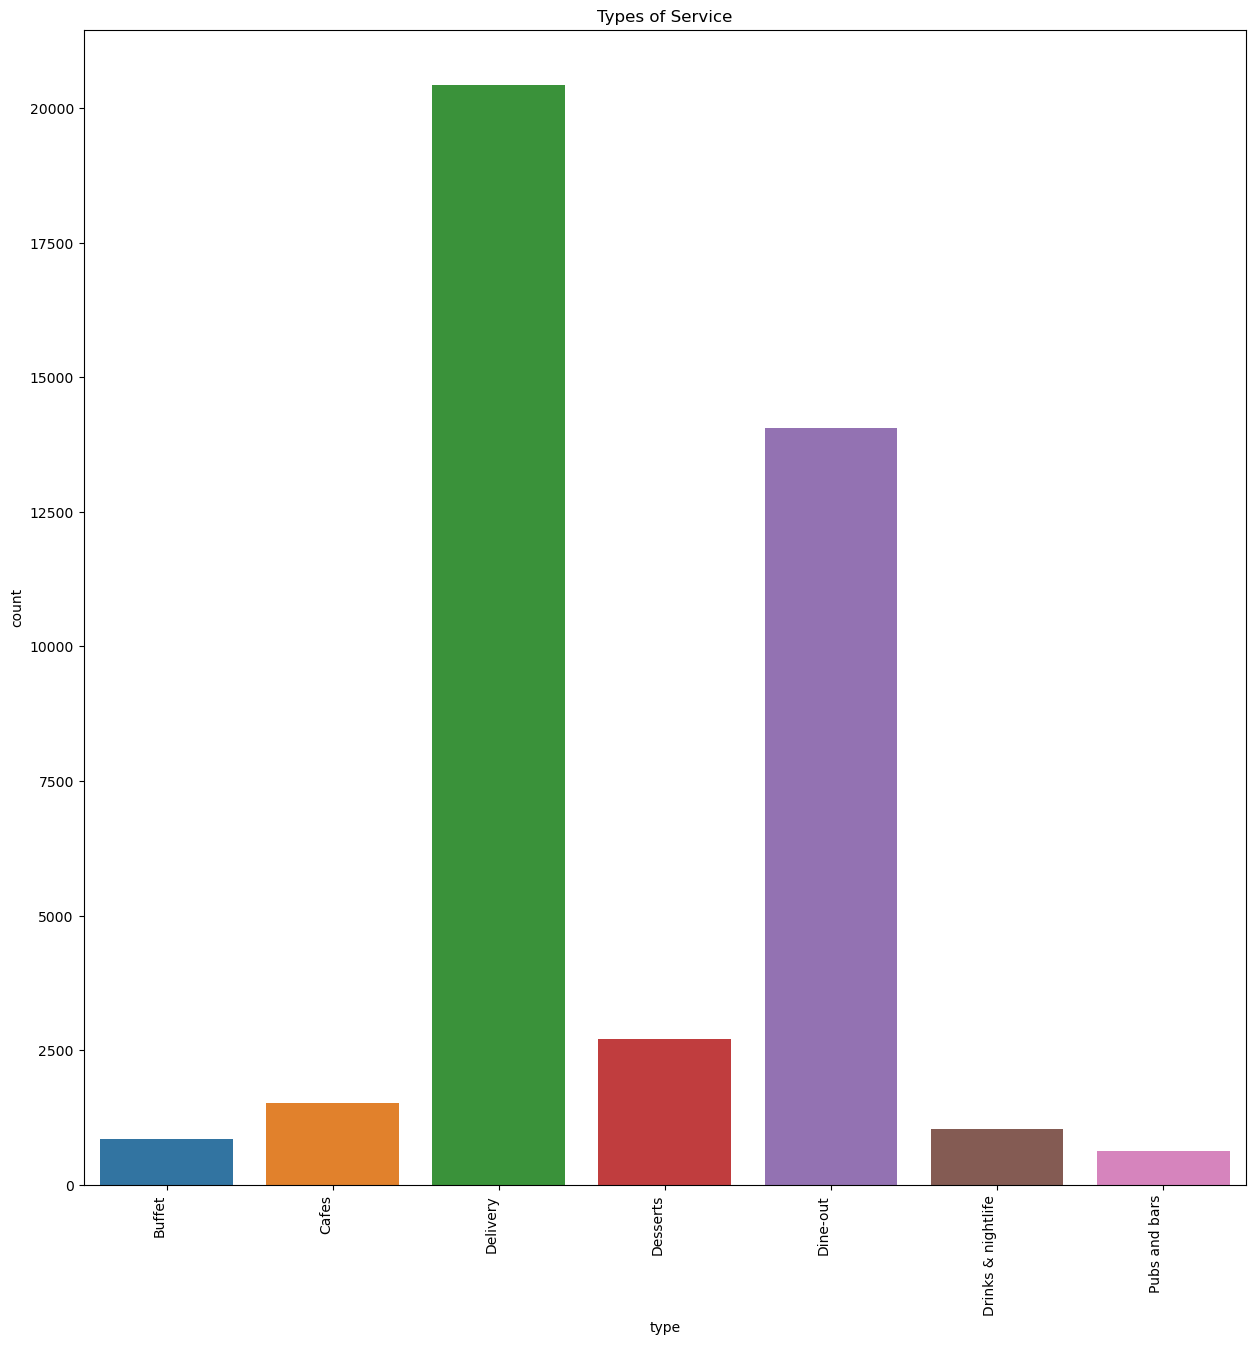

In [42]:
# Check the data in the 'type' column
print(df_original['type'].unique())

# Create the count plot
sns.countplot(x='type', data=df_original)

# Optionally, rotate x-axis labels and adjust figure size
plt.xticks(rotation=90, ha="right")
plt.gcf().set_size_inches(15, 15)

# Set title
plt.title('Types of Service')

# Show the plot
plt.show()

### Type And rating

<Figure size 9000x5000 with 0 Axes>

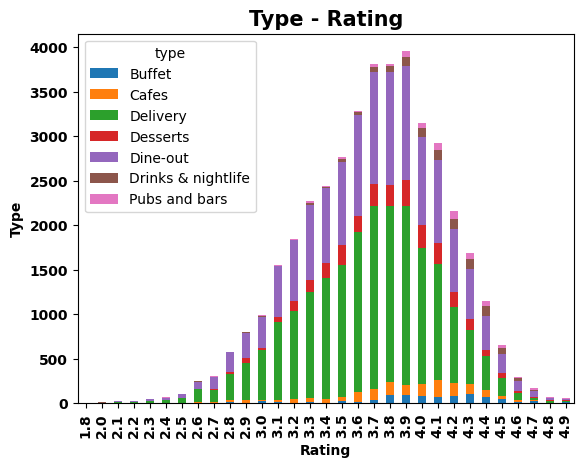

<Figure size 9000x5000 with 0 Axes>

In [43]:
#Type and Rating
type_plt=pd.crosstab(df_original['rate'],df_original['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.figure(figsize=(90,50))

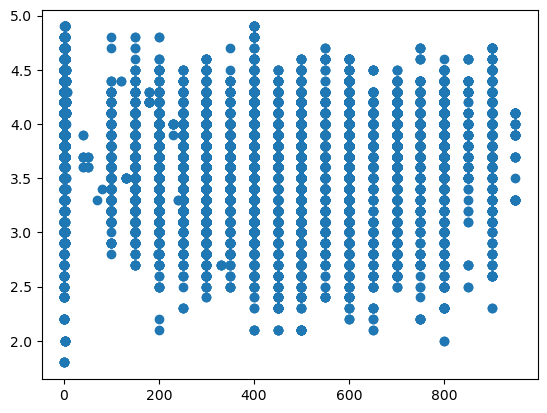

In [44]:
plt.scatter(df_original['cost'], df_original['rate'])

### Histogram of distribution of restaurant ratings

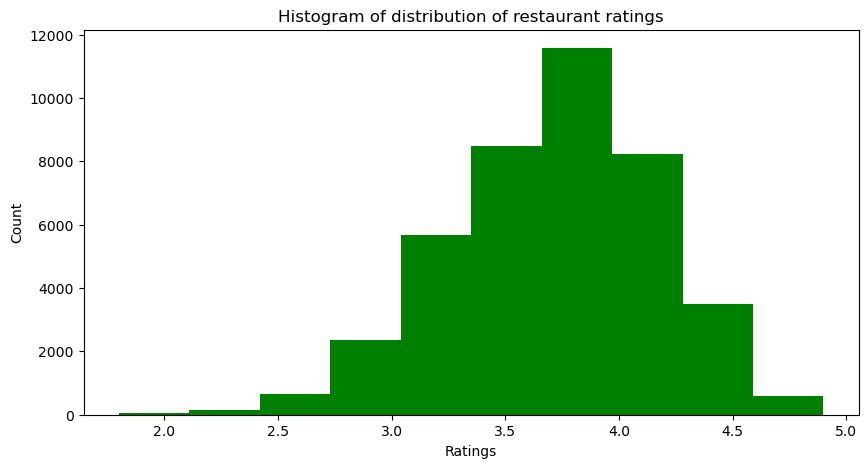

In [45]:
# Plotting the distribution of restaurant ratings
plt.figure(figsize = (10, 5))
plt.hist(df_original.rate, bins = 10, color = "g")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Histogram of distribution of restaurant ratings")
plt.show()

### Top 15 Restro with maximum number of outlets

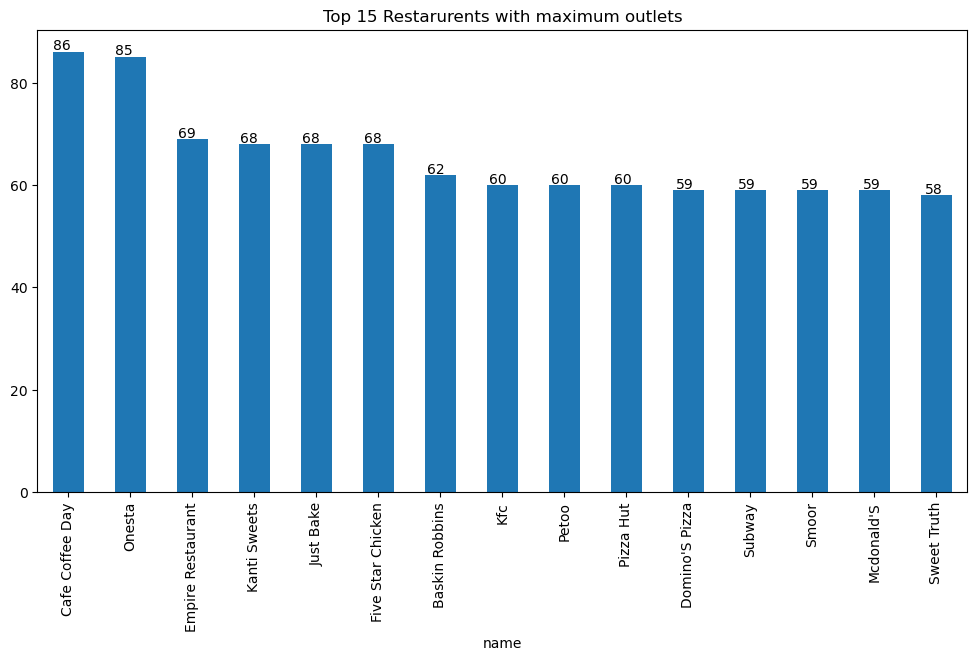

In [46]:
#Top 15 Restro with maximum number of outlets
ax=df_original['name'].value_counts().head(15).plot.bar(figsize =(12,6))
ax.set_title("Top 15 Restarurents with maximum outlets")
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() * 1.005, i.get_height() * 1.005))

### Most famous restaurant chains in Bengaluru

Text(0.5, 0, 'Number of outlets')

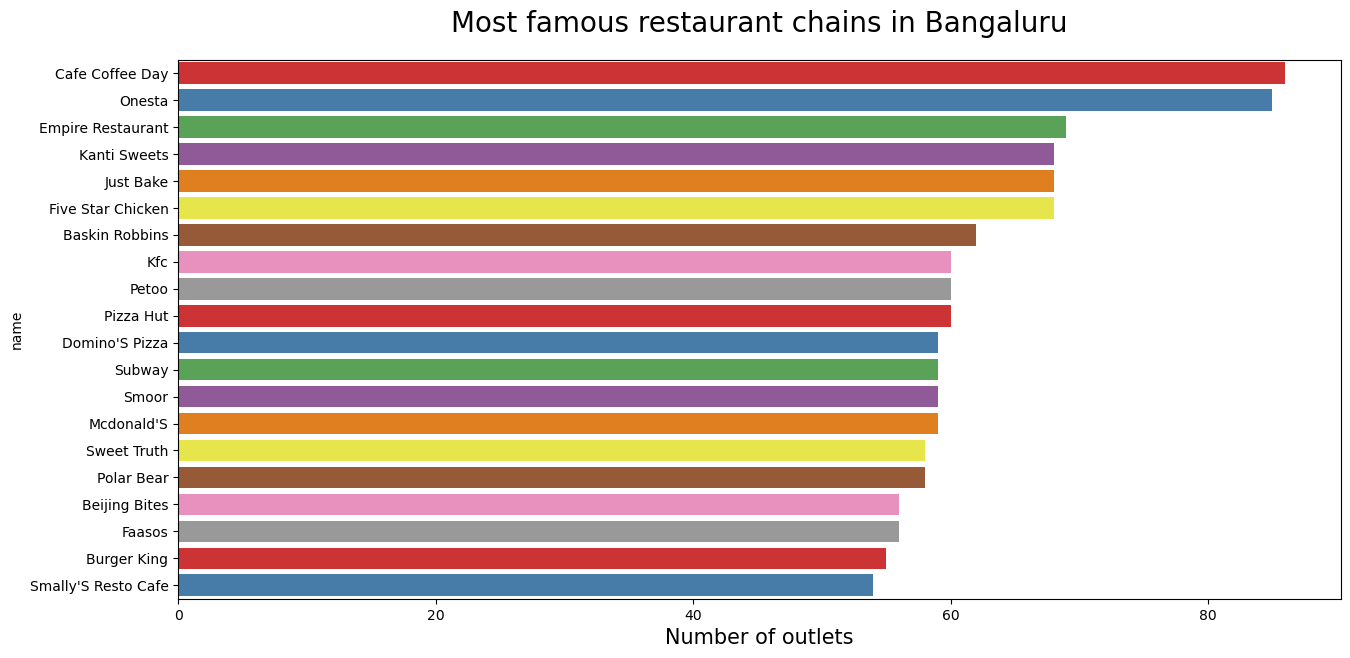

In [47]:
#Most famous restaurant chains in Bengaluru
plt.figure(figsize=(15,7))
chains=df_original['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

### Restaurant Count by Location

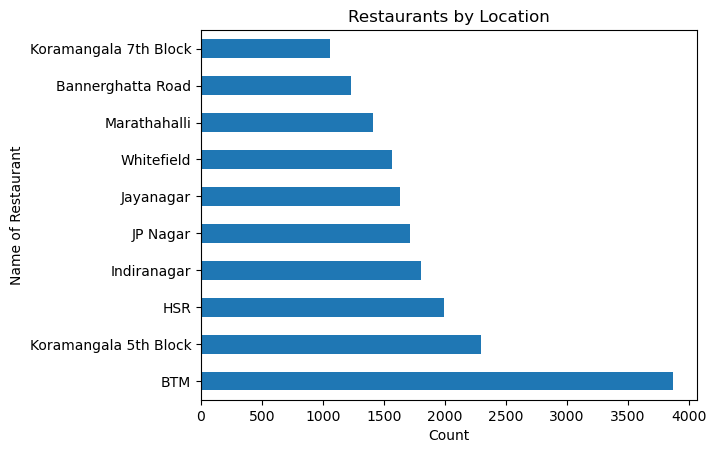

In [48]:
# Restaurant Count by Location
df_original.location.value_counts().nlargest(10).plot(kind="barh")
plt.title("Restaurants by Location")
plt.xlabel("Count")
plt.ylabel("Name of Restaurant")
plt.show()

### MANY MORE WORK CAN BE DONE WITH THIS PROJECT IN FUTURE. 